In [ ]:
""" This module quantifies the reduced number and frequency of days below freezing """

In [2]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

array([1, 2, 3, 4, 5, 6])

In [23]:
freeze_count_high = np.zeros( (12, int( len(years) )) ) # Oct to april is 7 months
months = np.arange(1,13)
for month in months:
    for i, year in enumerate(years):
        count = 0
        highs = tp.collect_month(month,year,0)
        for temp in highs:
            if temp < 32.0:
                count+=1
        freeze_count_high[month-1,i] = count
print("Completed.")

Completed.


In [38]:
freeze_count_low = np.zeros( (12, int( len(years) )) ) # Oct to april is 7 months
months = np.arange(1,13)
for month in months:
    for i, year in enumerate(years):
        count = 0
        temps = tp.collect_month(month,year,2)
        for temp in temps:
            if temp < 32.0:
                count+=1
        freeze_count_low[month-1,i] = count
print("Completed.")

Completed.


Total Days lost since 1960: 23.659090909090867


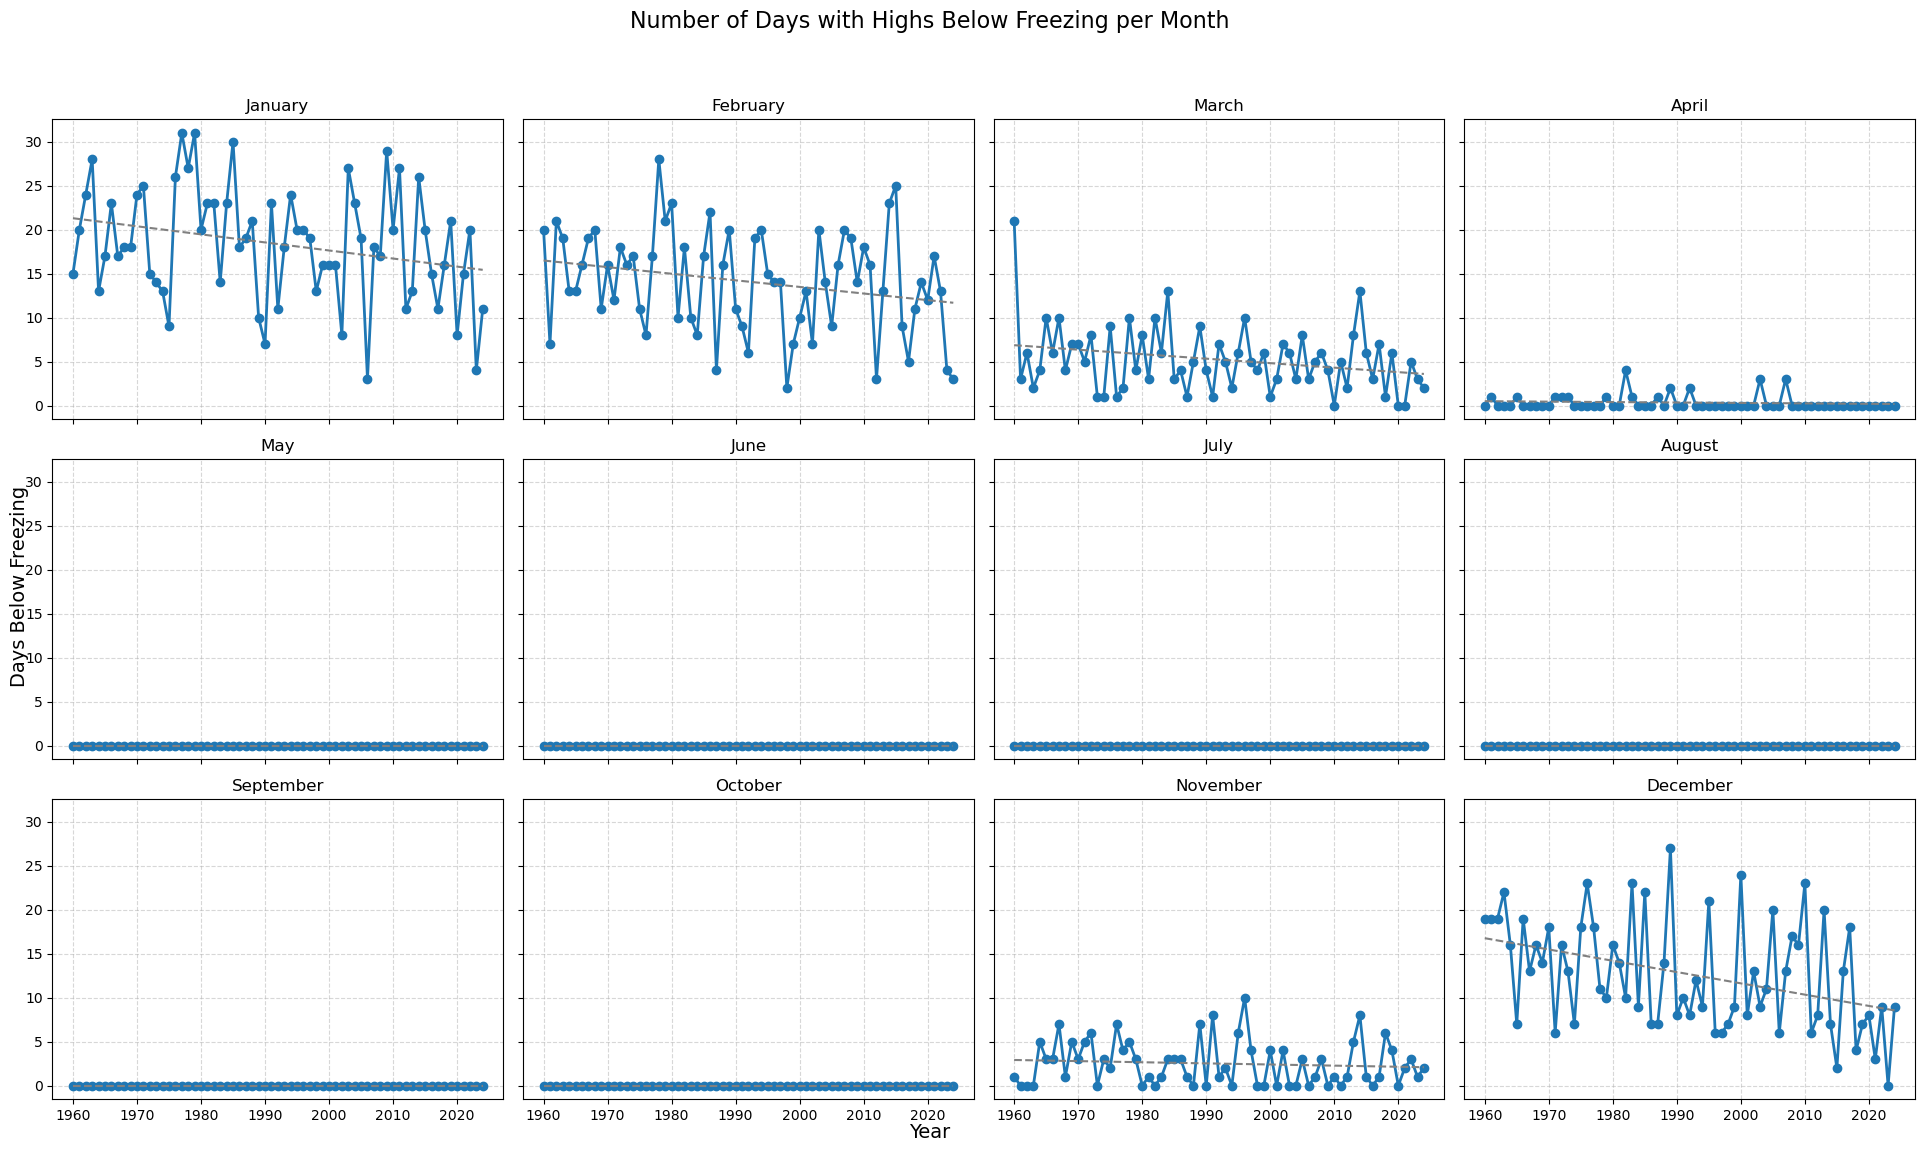

In [42]:
# Convert years to integers
x = np.array(years).astype(int)

# Set up the subplots: 3 rows × 4 columns
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True, sharey=True)
fig.suptitle("Number of Days with Highs Below Freezing per Month", fontsize=16)

# Flatten axes array to loop through easily
axes = axes.flatten()
month_dic = ["January","February","March","April","May","June","July","August","September","October","November","December"]
days_lost = []

for month in range(1, 13):
    ax = axes[month - 1]
    y = freeze_count_high[month - 1, :]
    
    ax.plot(x, y, marker='o', linewidth=2)
    
    # Add a trend line
    z = np.polyfit(x, y, 1)
    days_lost.append(z[0]*(int(len(years))))
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='gray')
    
    ax.set_title(f"{month_dic[month-1]}", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Days Below Freezing', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.04, 0.04, 1, 0.95])  # Leave room for suptitle and labels
print("Total Days lost since 1960:",abs(sum(days_lost)))
plt.show()

Total Days lost since 1960: 57.80965909090899


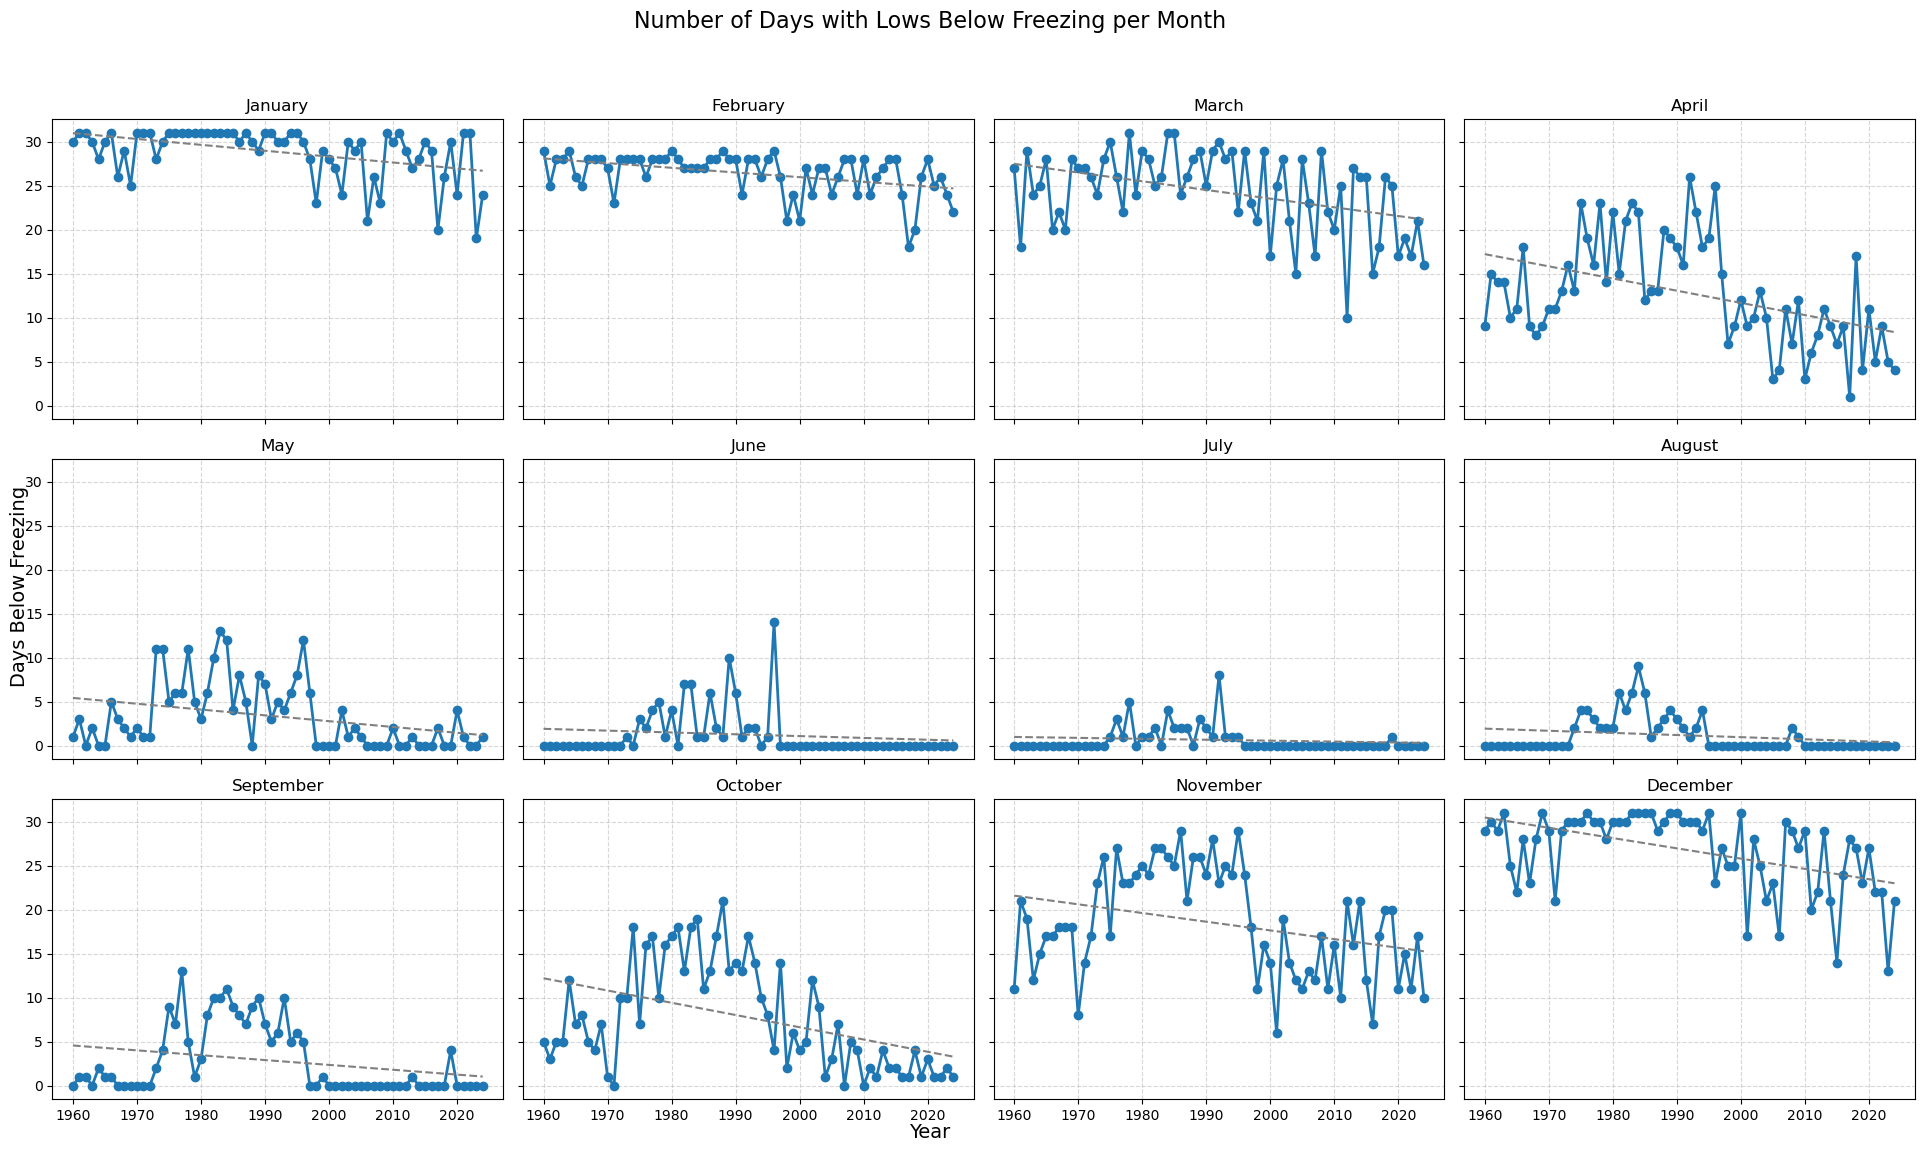

In [43]:
# Convert years to integers
x = np.array(years).astype(int)

# Set up the subplots: 3 rows × 4 columns
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True, sharey=True)
fig.suptitle("Number of Days with Lows Below Freezing per Month", fontsize=16)

# Flatten axes array to loop through easily
axes = axes.flatten()
month_dic = ["January","February","March","April","May","June","July","August","September","October","November","December"]
days_lost = []

for month in range(1, 13):
    ax = axes[month - 1]
    y = freeze_count_low[month - 1, :]
    
    ax.plot(x, y, marker='o', linewidth=2)
    
    # Add a trend line
    z = np.polyfit(x, y, 1)
    days_lost.append(z[0]*(int(len(years))))
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='gray')
    
    ax.set_title(f"{month_dic[month-1]}", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Days Below Freezing', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.04, 0.04, 1, 0.95])  # Leave room for suptitle and labels
print("Total Days lost since 1960:",abs(sum(days_lost)))
plt.show()